In [1]:
import sys
sys.path.append(sys.path[0] + "/..")

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, clear_output, HTML, Javascript
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

In [2]:
df_dija_index = pd.read_csv('../experiments/data/raw/DIJA-index-2006-2018.csv')
df_dija_index['Date'] = pd.to_datetime(df_dija_index['Date'])
df_dija_index.set_index('Date', inplace=True)

In [3]:
from hedgepy.utils import read_series, write_series, read_data

df = read_data('DIJA-2006-2018-clean')
dcor_ts = read_series('dija_2006-18-rolling_90d_dcor')

In [4]:
from hedgepy.core import HedgeFrame, build_network_time_series
from hedgepy.centrality import global_degree_centrality, global_eigencentrality

nx_ts_soft = build_network_time_series(dcor_ts, soft_threshold=True)

In [60]:
nx_ts_hard = build_network_time_series(dcor_ts, soft_threshold=False)

In [6]:
nx_ts_02 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.2)
nx_ts_03 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.3)
nx_ts_04 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.4)
nx_ts_05 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.5)
nx_ts_06 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.6)
nx_ts_07 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.7)
nx_ts_08 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.8)
nx_ts_09 = build_network_time_series(dcor_ts, soft_threshold=False, corr_threshold=0.9)

In [7]:
nx_ts_list = [nx_ts_02, nx_ts_03, nx_ts_04, nx_ts_05, nx_ts_06, nx_ts_07, nx_ts_08, nx_ts_09]

df_list = [global_degree_centrality(G) for G in nx_ts_list]
df_dc = pd.concat(df_list, axis=1)

In [64]:
df_ec = global_eigencentrality(nx_ts_soft)

In [76]:
df_ec_03 = global_eigencentrality(nx_ts_03)
df_ec_04 = global_eigencentrality(nx_ts_04)
# df_ec_05 = global_eigencentrality(nx_ts_05)
# df_ec_06 = global_eigencentrality(nx_ts_06)

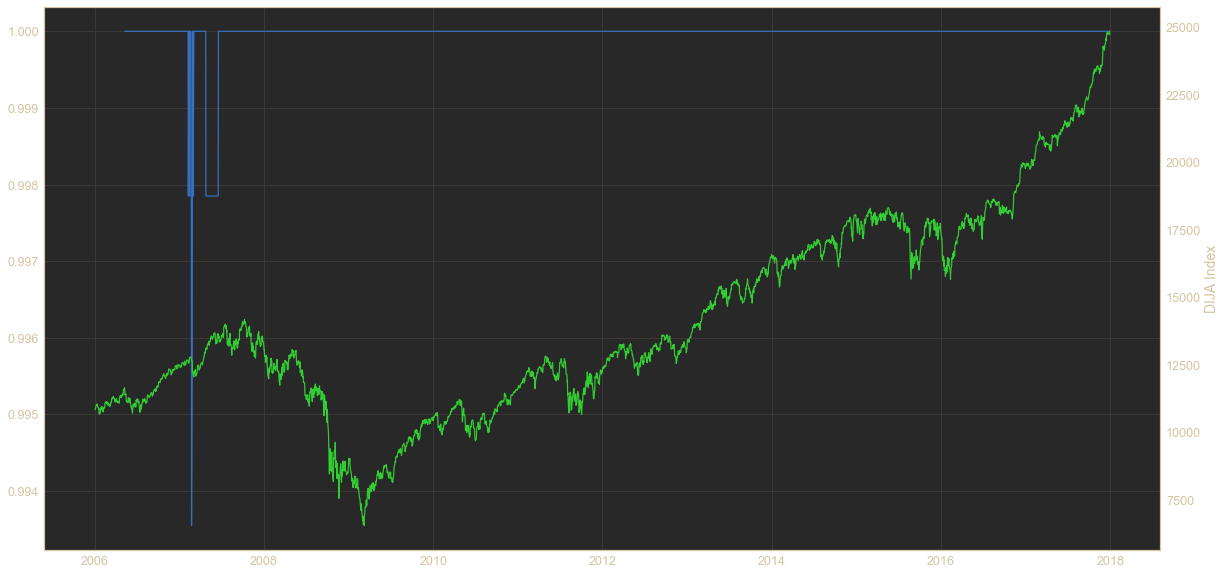

In [102]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_dc['dcor > 0.2'])
ax2 = ax.twinx()
ax2.plot(df_dija_index['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
ax2.grid(False)

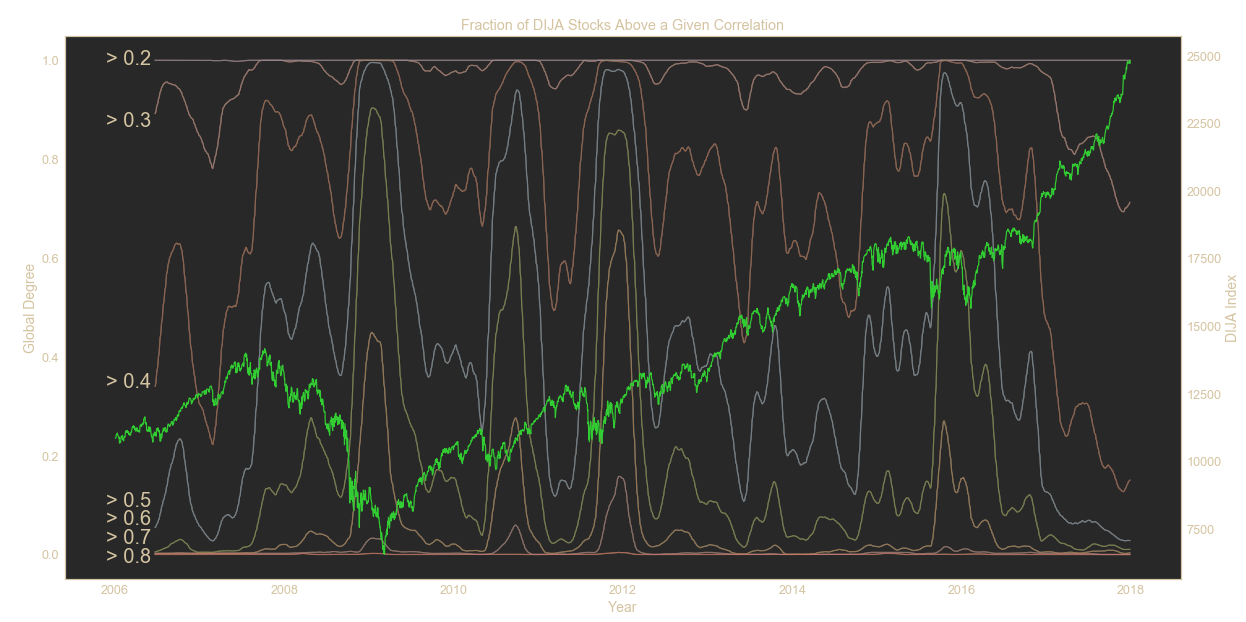

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
for col in df_dc.columns:
    ax.plot(df_dc[col].rolling(30).mean(), alpha=0.2)

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Global Degree", fontsize=14)
ax.set_title('Fraction of DIJA Stocks Above a Given Correlation')
ax.grid(False)
ax.annotate('> 0.2',
            xy=(0.085, .92), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.3',
            xy=(0.085, .82), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.4',
            xy=(0.085, .40), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.5',
            xy=(0.085, .21), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.6',
            xy=(0.085, .18), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.7',
            xy=(0.085, .15), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.8',
            xy=(0.085, .12), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

ax2 = ax.twinx()
ax2.plot(df_dija_index['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
ax2.grid(False)
# plt.savefig('../experiments/resources/dija-correlation-gradient', bbox_inches="tight")

In [23]:
col_names = [f'dcor > {i}' for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]
df_dc.columns = col_names

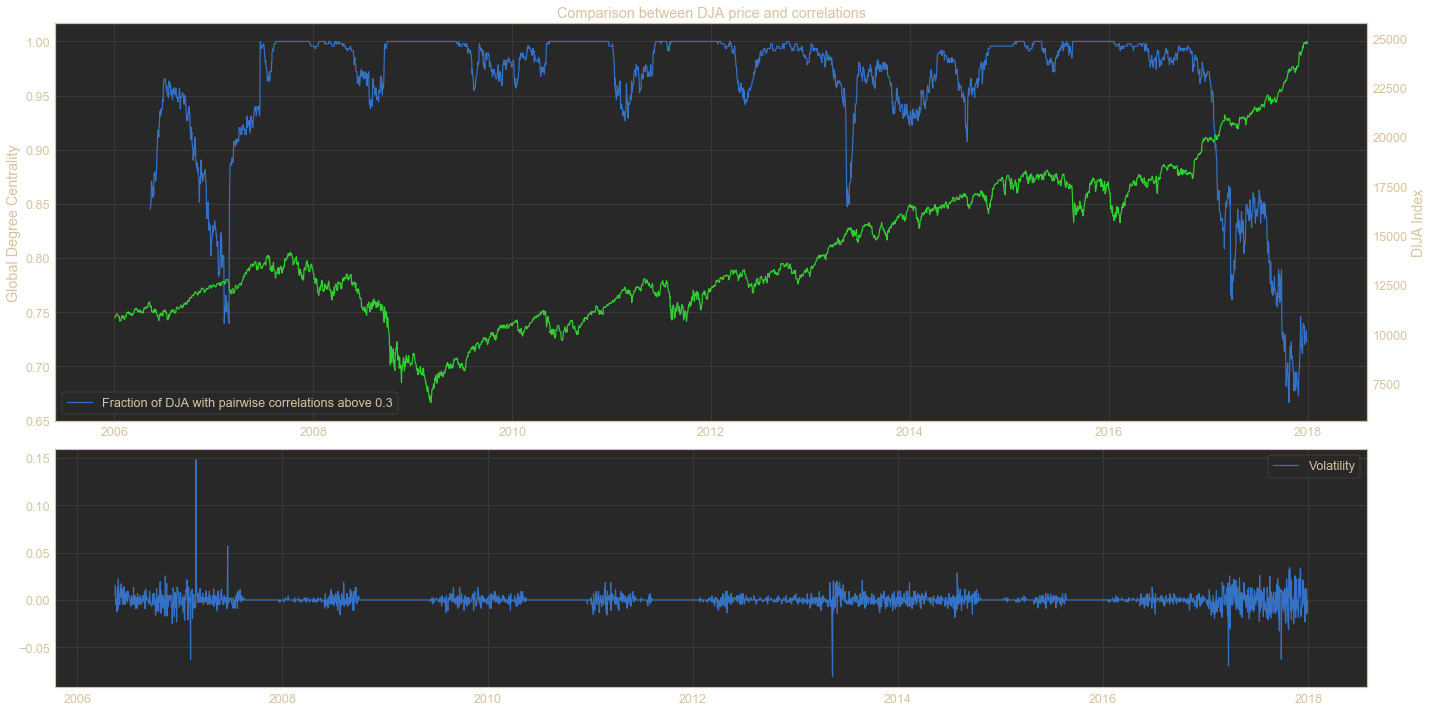

In [25]:
from matplotlib import gridspec
fig, ax = plt.subplots(figsize=(20,10))
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1.5])

plt.subplot(gs[0])
plt.plot(df_dc['dcor > 0.3'])
plt.title('Comparison between DJA price and correlations')
plt.ylabel('Global Degree Centrality')
plt.legend(['Fraction of DJA with pairwise correlations above 0.3'], loc='lower left')
# ax.set_xlabel("Year", fontsize=14)
# ax.set_ylabel("Global Degree Centrality", fontsize=14)
# ax.set_title('Fraction of DJA stocks with pairwise correlations above 0.3')
ax2 = plt.twinx()
ax2.plot(df_dija_index['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
# ax2.legend(['Price'], loc='best')
ax2.grid(False)

plt.subplot(gs[1])
plt.plot(df_dc['dcor > 0.3'].pct_change())
plt.tight_layout()
plt.legend(['Volatility'])
# ax.set_xlabel("Year", fontsize=14)
# ax.set_ylabel("Volatility", fontsize=14)
# plt.savefig('../experiments/resources/dija-corr-vol-above-03', bbox_inches="tight")

In [26]:
df_dc['2007'][df_dc['2007']['dcor > 0.3'] == min(df_dc['2007']['dcor > 0.3'])]

,dcor > 0.2,dcor > 0.3,dcor > 0.4,dcor > 0.5,dcor > 0.6,dcor > 0.7,dcor > 0.8,dcor > 0.9
2007-02-08,1.000000,0.739785,0.200000,0.021505,0.004301,0.002151,0.002151,0.0
2007-02-26,0.995699,0.739785,0.197849,0.021505,0.004301,0.002151,0.002151,0.0


Fraction of stocks above 0.3 correlation hits the 2007 minimum on Feb 8th. Same day HSBC warns bad debt provisions for 2006 would be 20% than expected. Looking back from the beginning of 2018, the largest single day jump of 15% occured on Feb 26th.

In [27]:
df_dc['2007'][df_dc['2007']['dcor > 0.3'] == max(df_dc['2007']['dcor > 0.3'])].head()

,dcor > 0.2,dcor > 0.3,dcor > 0.4,dcor > 0.5,dcor > 0.6,dcor > 0.7,dcor > 0.8,dcor > 0.9
2007-06-21,1.0,1.0,0.655914,0.187097,0.012903,0.004301,0.002151,0.0
2007-08-17,1.0,1.0,0.860215,0.400000,0.077419,0.006452,0.002151,0.0
2007-08-20,1.0,1.0,0.860215,0.387097,0.066667,0.006452,0.002151,0.0
2007-08-21,1.0,1.0,0.864516,0.382796,0.062366,0.006452,0.002151,0.0
2007-08-22,1.0,1.0,0.840860,0.393548,0.064516,0.006452,0.002151,0.0


In [28]:
m = df_dc['dcor > 0.3'].pct_change().max()
df_dc['dcor > 0.3'].pct_change()[df_dc['dcor > 0.3'].pct_change() == m]

2007-02-27    0.148256
Name: dcor > 0.3, dtype: float64

Over the proceeding 4 months, the fraction of stocks above 0.3 correlation hit 100% on June 21st, a day after Merrill Lynch seized $800M in assets from Bear Stern's hedge funds as the fund implode.

In [29]:
df_ec['pct_change'] = df_ec[['global_eigencentrality']].pct_change()
df_ec.dropna(inplace=True)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import math

def optimize_OneClassSVM(X, n):
    print('searching for optimal hyperparameters...')
    nu = np.linspace(start=1e-5, stop=1e-2, num=n)
    gamma = np.linspace(start=1e-6, stop=1e-3, num=n)
    opt_diff = 1.0
    opt_nu = None
    opt_gamma = None
    for i in range(len(nu)):
        for j in range(len(gamma)):
            classifier = OneClassSVM(kernel="rbf", nu=nu[i], gamma=gamma[j])
            classifier.fit(X)
            label = classifier.predict(X)
            p = 1 - float(sum(label == 1.0)) / len(label)
            diff = math.fabs(p - nu[i])
            if diff < opt_diff:
                opt_diff = diff
                opt_nu = nu[i]
                opt_gamma = gamma[j]
    return opt_nu, opt_gamma

In [31]:
X_train = df_ec[['pct_change']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled).dropna()

opt_nu, opt_gamma = optimize_OneClassSVM(X_train, n=20)

searching for optimal hyperparameters...


In [32]:
print(opt_nu)
print(opt_gamma)

0.006845263157894737
0.00010615789473684212


In [33]:
model = OneClassSVM(nu=opt_nu, kernel='rbf', gamma=opt_gamma)
model.fit(X_train)
anomalies = pd.Series(model.predict(X_train), index=df_ec.index)

In [34]:
df_ec['anomalies'] = anomalies
df_ec['DJA'] = df_dija_index['Close']

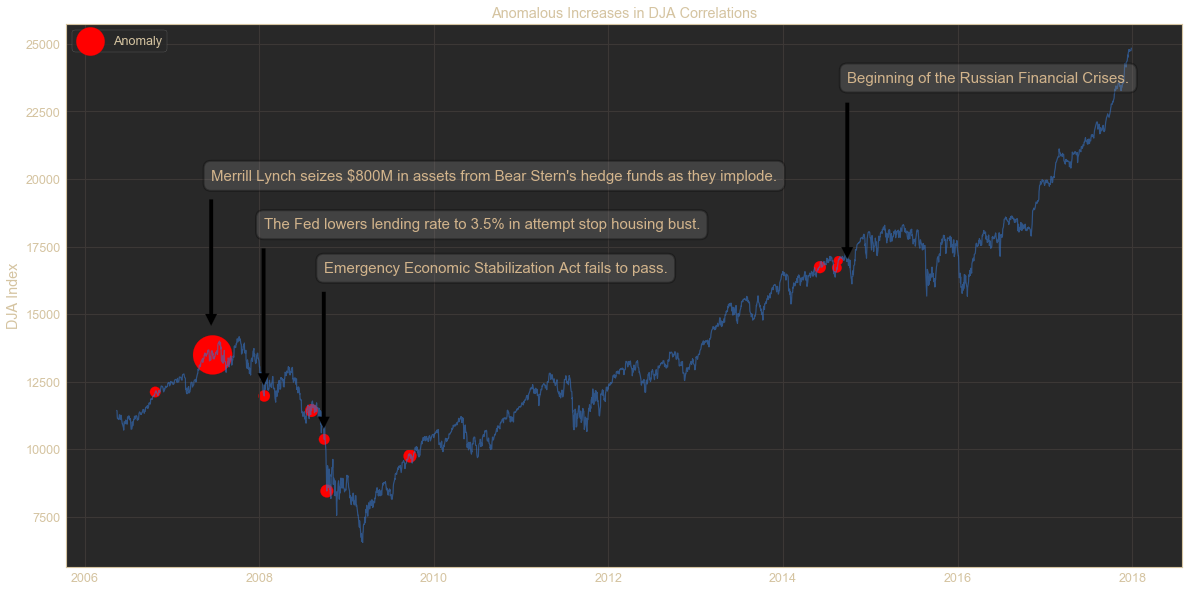

In [35]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)

a = df_ec.loc[(df_ec['anomalies'] == -1)]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec.index, df_ec['DJA'], alpha=0.6)

b = a.loc[a['pct_change'] > 0]
c = a.loc[a['pct_change'] < 0]

bsize = np.abs([(i*10000)**2.5 for i in b['pct_change'].tolist()])
csize = np.abs([(i*10000)**2.5 for i in c['pct_change'].tolist()])
ax.scatter(df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] > 0)].index, df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] > 0)], label='Anomaly', color='red', s=bsize)
# ax.scatter(df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] < 0)].index, df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] < 0)], label='Anomalous Decrease', color='orange', s=csize)

bbox_props = dict(boxstyle="round,pad=0.5", fc="gray", ec="black", lw=2, alpha=0.3)
arrow_props = dict(facecolor='black', shrink=0.05)

# ax.annotate('HSBC warns bad debt provisions for 2006 would be 20% higher than expected',
#             xy=(0.1, 0.4),
#             xycoords='axes fraction',
#             xytext=(0.1, 0.8),
#             color='tan',
#             size=15,
#             bbox=bbox_props,
#             arrowprops=arrow_props,
#             horizontalalignment='left',
#             verticalalignment='center')

ax.annotate('Merrill Lynch seizes $800M in assets from Bear Stern\'s hedge funds as they implode.',
            xy=(0.13, 0.43),
            xycoords='axes fraction',
            xytext=(0.13, 0.72),
            color='tan',
            size=15,
            bbox=bbox_props,
            arrowprops=arrow_props,
            horizontalalignment='left',
            verticalalignment='center')

ax.annotate('The Fed lowers lending rate to 3.5% in attempt stop housing bust.',
            xy=(0.177, 0.32),
            xycoords='axes fraction',
            xytext=(0.177, 0.63),
            color='tan',
            size=15,
            bbox=bbox_props,
            arrowprops=arrow_props,
            horizontalalignment='left',
            verticalalignment='center')

ax.annotate('Emergency Economic Stabilization Act fails to pass.',
            xy=(0.231, 0.24),
            xycoords='axes fraction',
            xytext=(0.231, 0.55),
            color='tan',
            size=15,
            bbox=bbox_props,
            arrowprops=arrow_props,
            horizontalalignment='left',
            verticalalignment='center')

ax.annotate('Beginning of the Russian Financial Crises.',
            xy=(0.7, 0.55),
            xycoords='axes fraction',
            xytext=(0.7, 0.9),
            color='tan',
            size=15,
            bbox=bbox_props,
            arrowprops=arrow_props,
            horizontalalignment='left',
            verticalalignment='center')


ax.set_title('Anomalous Increases in DJA Correlations')
ax.set_ylabel('DJA Index')
ax.legend()
plt.savefig('../experiments/resources/dija-anomalies', bbox_inches="tight")

In [36]:
a[a['pct_change'] > 0]

,global_eigencentrality,pct_change,anomalies,DJA
2006-10-23,0.178757,0.000666,-1,12116.910160
2007-06-20,0.178976,0.001881,-1,13489.419920
2008-01-22,0.179047,0.000704,-1,11971.190430
2008-08-07,0.178005,0.000771,-1,11431.429690
2008-09-29,0.178450,0.000668,-1,10365.450200
2008-10-10,0.178982,0.000772,-1,8451.190430
2009-09-23,0.178203,0.000782,-1,9748.549805
2014-06-04,0.178733,0.000731,-1,16737.529300
2014-08-14,0.178847,0.000614,-1,16713.580080
2014-08-20,0.178960,0.000587,-1,16979.130860


In [37]:
import networkx as nx

def eigencentrality(nx_ts):
    dict_time_series = {
        timestamp: nx.eigenvector_centrality(G, weight='weight')
        for timestamp, G in nx_ts.items()
    }
    return dict_time_series

ec = eigencentrality(nx_ts_soft)

In [38]:
def degree_centrality(nx_ts):
    dict_time_series = {
        timestamp: nx.degree_centrality(G)
        for timestamp, G in nx_ts.items()
    }
    return dict_time_series

In [39]:
cols2 = df['Name'].unique()

In [40]:
cols = dcor_ts[pd.Timestamp('2006-05-12 00:00:00')].columns.tolist()

In [41]:
cols2

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [42]:
df_ec_all = pd.DataFrame.from_dict(ec, orient='index')
df_ec_all.columns = cols

In [43]:
dc = eigencentrality(nx_ts_hard)
df_dc_all = pd.DataFrame.from_dict(dc, orient='index')
df_dc_all.columns = cols

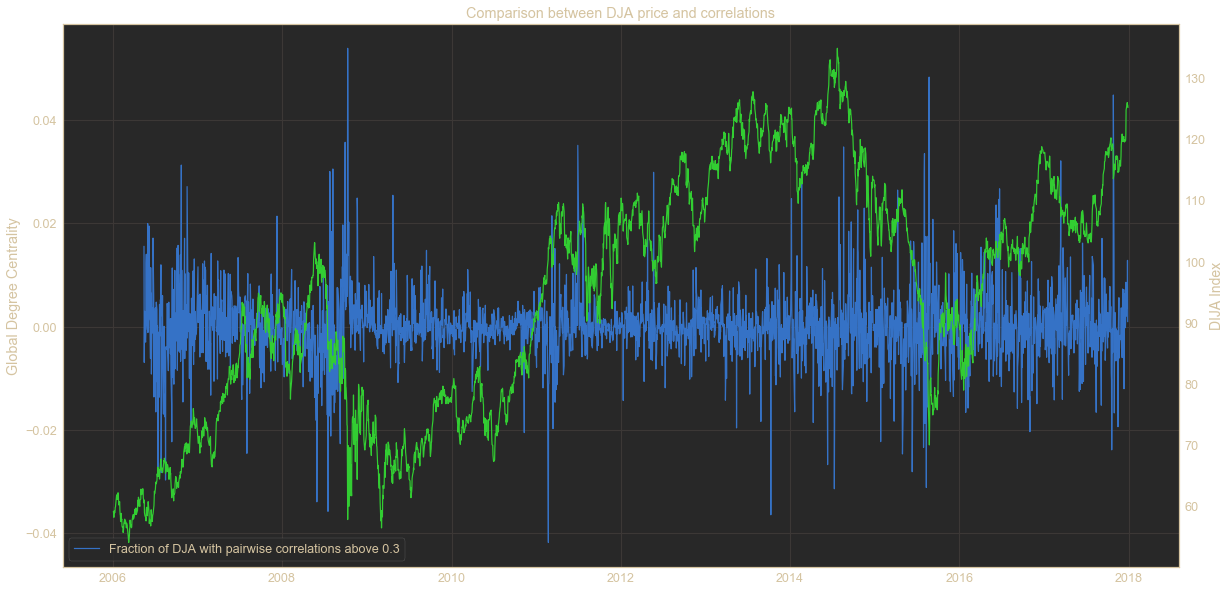

In [44]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(df_ec_all['CVX'].pct_change())
plt.title('Comparison between DJA price and correlations')
plt.ylabel('Global Degree Centrality')
plt.legend(['Fraction of DJA with pairwise correlations above 0.3'], loc='lower left')

ax2 = plt.twinx()
ax2.plot(df[df['Name'] == 'CVX']['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
# ax2.legend(['Price'], loc='best')
ax2.grid(False)

In [45]:
df_ec_all_chng = df_ec_all.pct_change()
df_ec_all_chng.dropna(inplace=True)

In [46]:
X_cvx_train = df_ec_all_chng[['CVX']]
cvx_scaler = StandardScaler()
cvx_scaled = scaler.fit_transform(X_cvx_train)
X_cvx_train = pd.DataFrame(cvx_scaled).dropna()

opt_cvx_nu, opt_cvx_gamma = optimize_OneClassSVM(X_cvx_train, n=20)

searching for optimal hyperparameters...


In [47]:
print(opt_cvx_nu)
print(opt_cvx_gamma)

0.006845263157894737
0.00010615789473684212


In [48]:
cvx_model = OneClassSVM(nu=opt_cvx_nu, kernel='rbf', gamma=opt_cvx_gamma)
cvx_model.fit(X_cvx_train)
cvx_anomalies = pd.Series(cvx_model.predict(X_cvx_train), index=df_ec_all_chng.index)

In [49]:
df_ec_all_chng['CVX_anomalies'] = cvx_anomalies
df_ec_all_chng['CVX_close'] = df[df['Name'] == 'CVX']['Close']

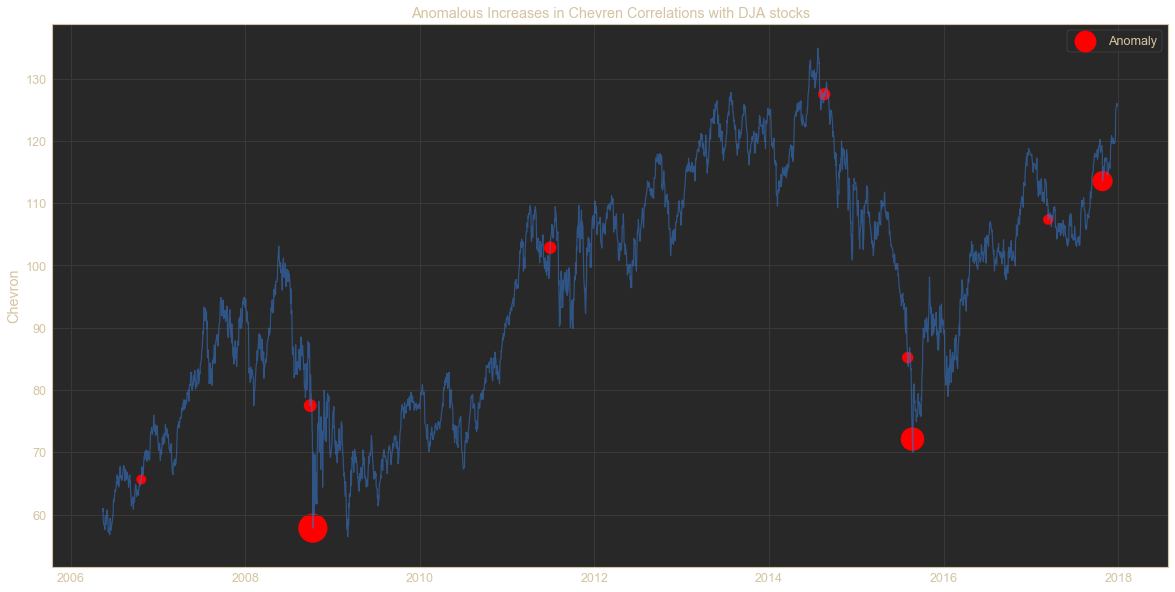

In [50]:
a_cvx = df_ec_all_chng.loc[(df_ec_all_chng['CVX_anomalies'] == -1)]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec_all_chng.index, df_ec_all_chng['CVX_close'], alpha=0.6)

b_cvx = a_cvx.loc[a_cvx['CVX'] > 0]
c_cvx = a_cvx.loc[a_cvx['CVX'] < 0]

cvx_bsize = np.abs([(i*100)**4 for i in b_cvx['CVX'].tolist()])
cvx_csize = np.abs([(i*100)**4 for i in c_cvx['CVX'].tolist()])
ax.scatter(df_ec_all_chng['CVX_close'][(df_ec_all_chng['CVX_anomalies']==-1) & (df_ec_all_chng['CVX'] > 0)].index, df_ec_all_chng['CVX_close'][(df_ec_all_chng['CVX_anomalies']==-1) & (df_ec_all_chng['CVX'] > 0)], label='Anomaly', color='red', s=cvx_bsize)
# ax.scatter(df_ec_all_chng['CVX_close'][(df_ec_all_chng['CVX_anomalies']==-1) & (df_ec_all_chng['CVX'] < 0)].index, df_ec_all_chng['CVX_close'][(df_ec_all_chng['CVX_anomalies']==-1) & (df_ec_all_chng['CVX'] < 0)], label='Anomaly', color='orange', s=cvx_csize)

ax.set_title('Anomalous Increases in Chevren Correlations with DJA stocks')
ax.set_ylabel('Chevron')
ax.legend()

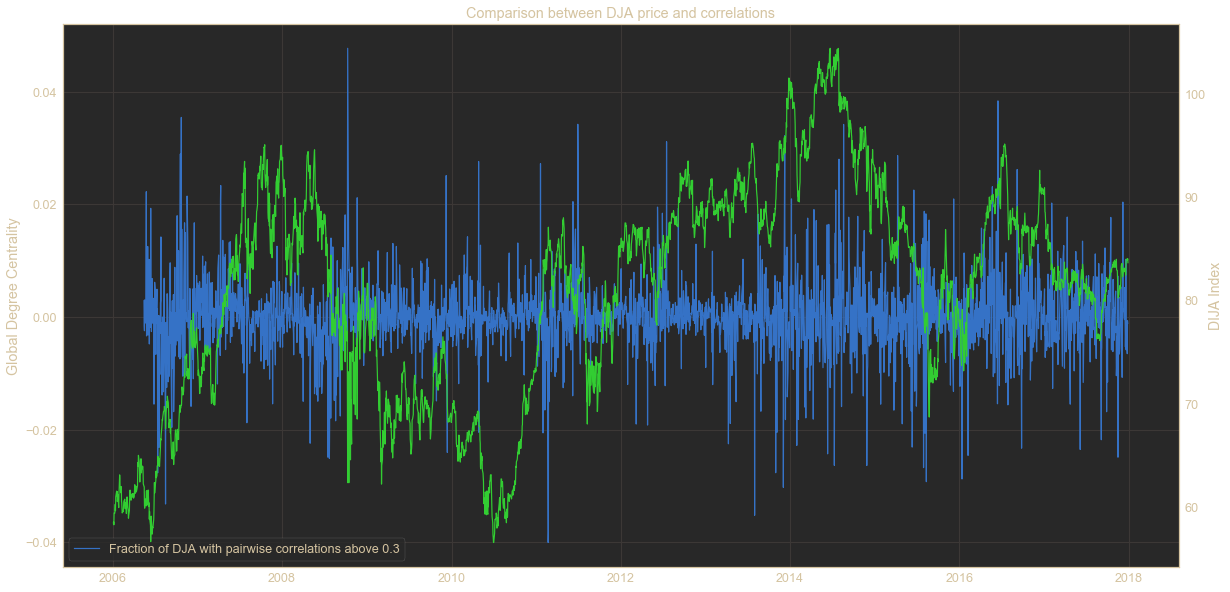

In [51]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(df_ec_all['XOM'].pct_change())
plt.title('Comparison between DJA price and correlations')
plt.ylabel('Global Degree Centrality')
plt.legend(['Fraction of DJA with pairwise correlations above 0.3'], loc='lower left')

ax2 = plt.twinx()
ax2.plot(df[df['Name'] == 'XOM']['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
# ax2.legend(['Price'], loc='best')
ax2.grid(False)

In [52]:
X_xom_train = df_ec_all_chng[['XOM']]
xom_scaler = StandardScaler()
xom_scaled = xom_scaler.fit_transform(X_xom_train)
X_xom_train = pd.DataFrame(xom_scaled).dropna()

opt_xom_nu, opt_xom_gamma = optimize_OneClassSVM(X_xom_train, n=20)

searching for optimal hyperparameters...


In [53]:
xom_model = OneClassSVM(nu=opt_xom_nu, kernel='rbf', gamma=opt_xom_gamma)
xom_model.fit(X_xom_train)
xom_anomalies = pd.Series(xom_model.predict(X_xom_train), index=df_ec_all_chng.index)

In [54]:
df_ec_all_chng['XOM_anomalies'] = xom_anomalies
df_ec_all_chng['XOM_close'] = df[df['Name'] == 'XOM']['Close']

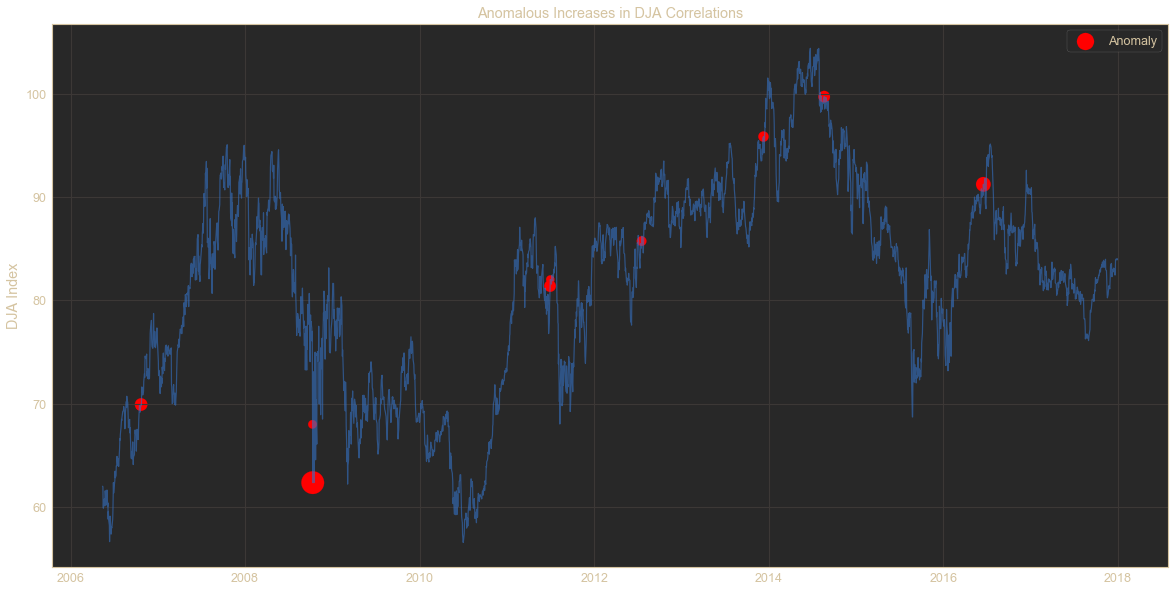

In [55]:
a_xom = df_ec_all_chng.loc[(df_ec_all_chng['XOM_anomalies'] == -1)]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec_all_chng.index, df_ec_all_chng['XOM_close'], alpha=0.6)

b_xom = a_xom.loc[a_xom['XOM'] > 0]
c_xom = a_xom.loc[a_xom['XOM'] < 0]

xom_bsize = np.abs([(i*100)**4 for i in b_xom['XOM'].tolist()])
xom_csize = np.abs([(i*100)**4 for i in c_xom['XOM'].tolist()])
ax.scatter(df_ec_all_chng['XOM_close'][(df_ec_all_chng['XOM_anomalies']==-1) & (df_ec_all_chng['XOM'] > 0)].index, df_ec_all_chng['XOM_close'][(df_ec_all_chng['XOM_anomalies']==-1) & (df_ec_all_chng['XOM'] > 0)], label='Anomaly', color='red', s=xom_bsize)
# ax.scatter(df_ec_all_chng['XOM_close'][(df_ec_all_chng['XOM_anomalies']==-1) & (df_ec_all_chng['XOM'] < 0)].index, df_ec_all_chng['XOM_close'][(df_ec_all_chng['XOM_anomalies']==-1) & (df_ec_all_chng['XOM'] < 0)], label='Anomaly', color='orange', s=xom_csize)

ax.set_title('Anomalous Increases in DJA Correlations')
ax.set_ylabel('DJA Index')
ax.legend()

In [56]:
X_cat_train = df_ec_all_chng[['CAT']]
cat_scaler = StandardScaler()
cat_scaled = cat_scaler.fit_transform(X_cat_train)
X_cat_train = pd.DataFrame(cat_scaled).dropna()

opt_cat_nu, opt_cat_gamma = optimize_OneClassSVM(X_cat_train, n=20)

searching for optimal hyperparameters...


In [57]:
cat_model = OneClassSVM(nu=opt_cat_nu, kernel='rbf', gamma=opt_cat_gamma)
cat_model.fit(X_cat_train)
cat_anomalies = pd.Series(cat_model.predict(X_cat_train), index=df_ec_all_chng.index)

In [58]:
df_ec_all_chng['CAT_anomalies'] = cat_anomalies
df_ec_all_chng['CAT_close'] = df[df['Name'] == 'CAT']['Close']

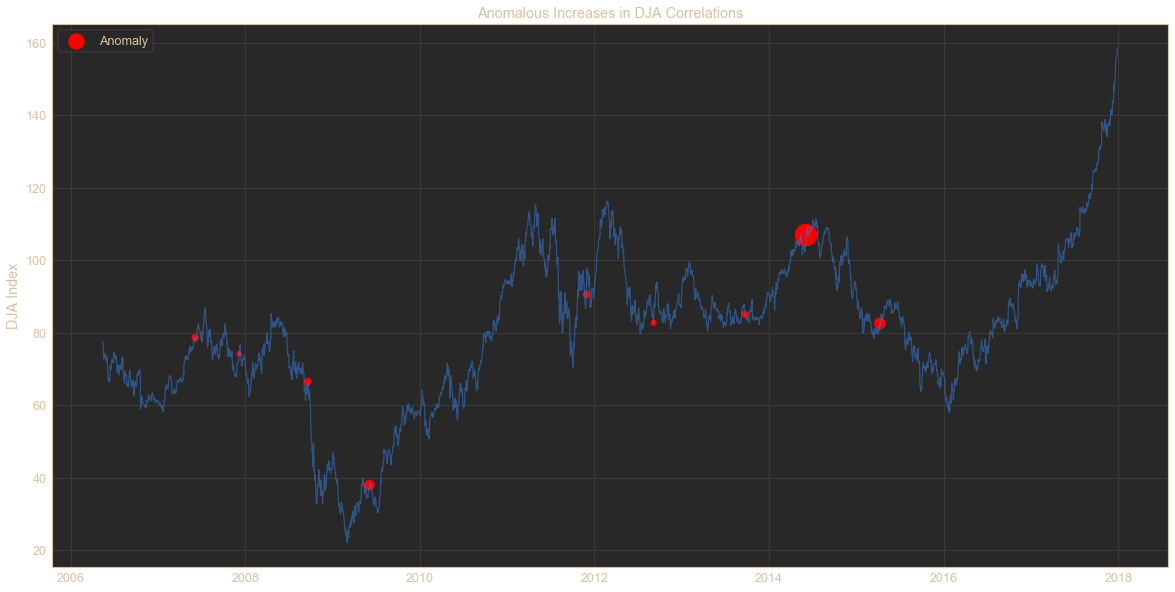

In [59]:
a_cat = df_ec_all_chng.loc[(df_ec_all_chng['CAT_anomalies'] == -1)]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec_all_chng.index, df_ec_all_chng['CAT_close'], alpha=0.6)

b_cat = a_cat.loc[a_cat['CAT'] > 0]
c_cat = a_cat.loc[a_cat['CAT'] < 0]

cat_bsize = np.abs([(i*100)**4 for i in b_cat['CAT'].tolist()])
cat_csize = np.abs([(i*100)**4 for i in c_cat['CAT'].tolist()])
ax.scatter(df_ec_all_chng['CAT_close'][(df_ec_all_chng['CAT_anomalies']==-1) & (df_ec_all_chng['CAT'] > 0)].index, df_ec_all_chng['CAT_close'][(df_ec_all_chng['CAT_anomalies']==-1) & (df_ec_all_chng['CAT'] > 0)], label='Anomaly', color='red', s=cat_bsize)
# ax.scatter(df_ec_all_chng['CAT_close'][(df_ec_all_chng['CAT_anomalies']==-1) & (df_ec_all_chng['CAT'] < 0)].index, df_ec_all_chng['CAT_close'][(df_ec_all_chng['CAT_anomalies']==-1) & (df_ec_all_chng['CAT'] < 0)], label='Anomaly', color='orange', s=cat_csize)

ax.set_title('Anomalous Increases in DJA Correlations')
ax.set_ylabel('DJA Index')
ax.legend()

In [134]:
from alpha_vantage.timeseries import TimeSeries
key = '34CW4J294SBIRRAM'
ts = TimeSeries(key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='DIS', outputsize='full')

data.to_csv('../experiments/data/raw/DJA-DIS-2000-2020')